<a href="https://colab.research.google.com/github/ckwei379/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_02%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**專題實作 #02：紅酒品質分類預測**

環境準備

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# 載入資料
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


觀察資料

In [25]:
# 觀察資料屬性
df.info()
# 除了"quality"為整數資料外，其他特徵皆為浮點數資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
# 統計觀察
df.describe()
# 從結果中可看出"density"數值差異不大

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


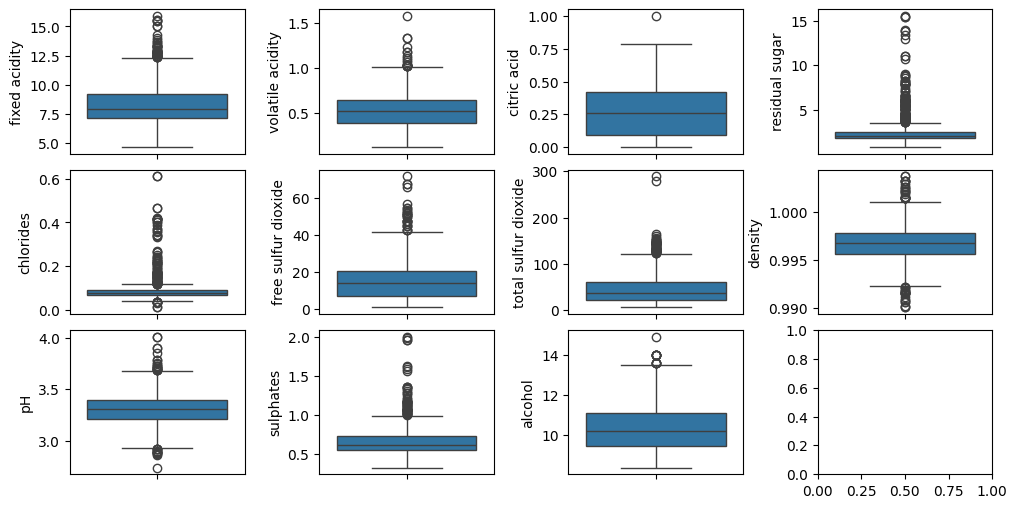

In [27]:
# 觀察資料是否有outlier
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(10, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()
# 從結果中可看見各特徵皆有outlier存在
# 高品質的紅酒可能具有與其他紅酒不同的特徵值，因此不移除outlier

進階觀察各特徵與"quality"之關係

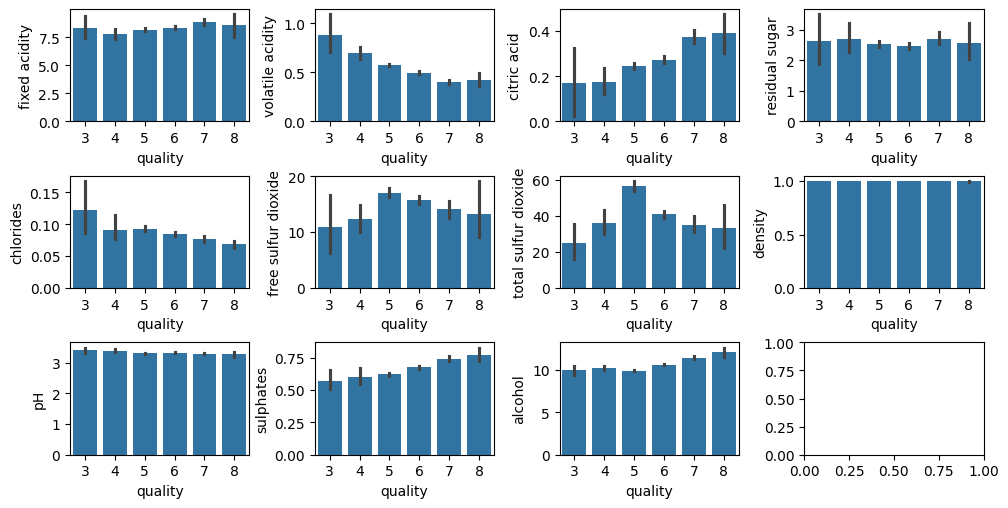

In [28]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(10, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()
# 從結果中可看出"fixed acidity"、"residual sugar"、"density"三特徵對於"quality"無明顯差異
# "citric acid"、"sulphates"、"alcohol"三特徵隨著"quality"增加而遞增
# "volatile acidity"、"chlorides"、"pH"三特徵隨著"quality"增加而遞減
# 無法從"free sulfur dioxide"、"total sulfur dioxide"兩特徵中觀察出與"quality"的關係

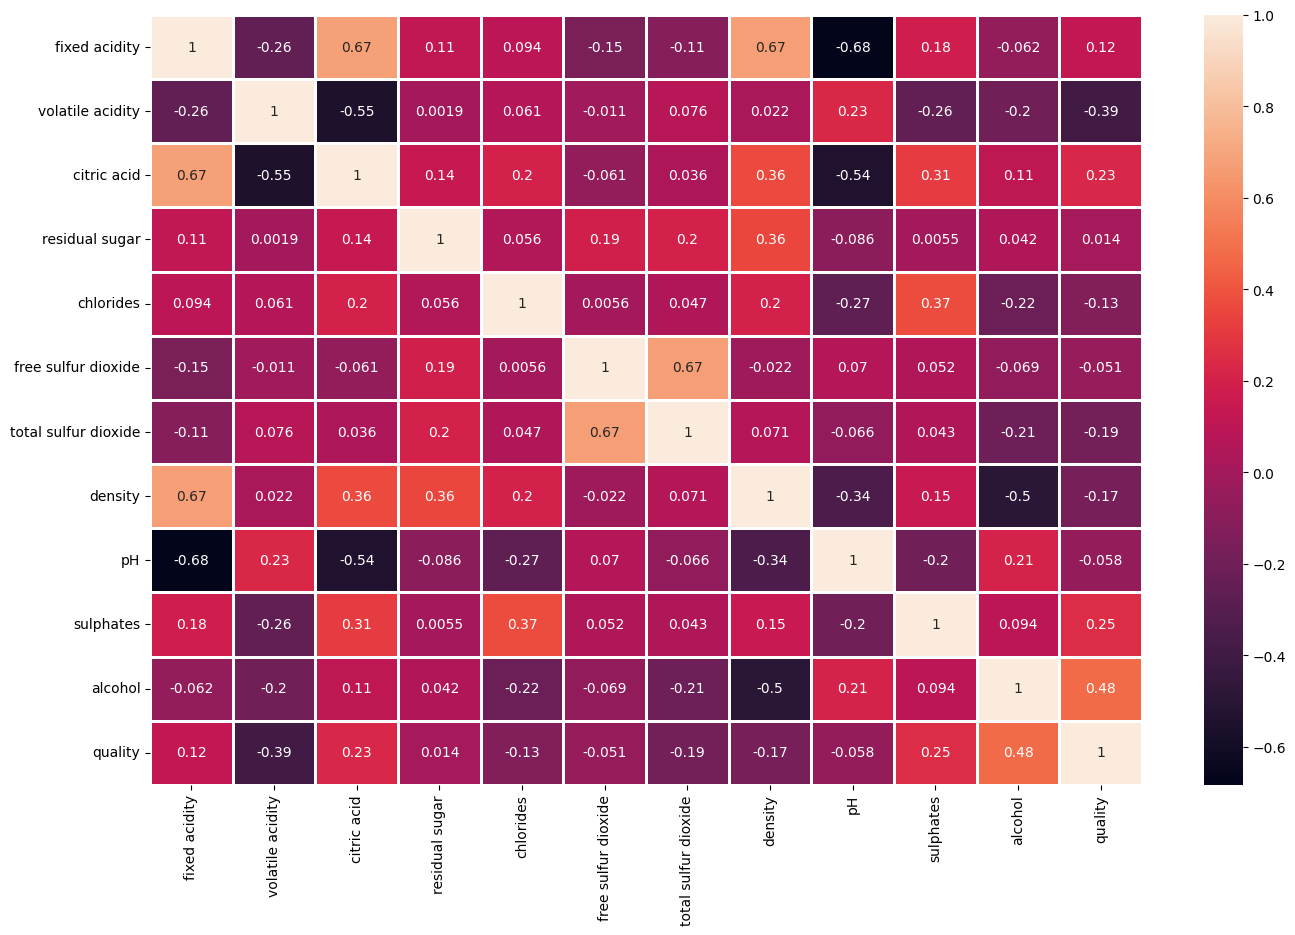

In [29]:
# 觀察特徵之間的關係程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.show()
# "citric acid"、"sulphates"、"alcohol"三特徵與"quality"呈現正相關，驗證上述觀察正確
# "volatile acidity"、"chlorides"、"pH"三特徵與"quality"呈現負相關，驗證上述觀察正確
# "free sulfur dioxide"與"total sulfur dioxide"具有0.67的高度正相關
# "citric acid"與"fixed acidity"具有0.67的高度正相關
# "density"與"fixed acidity"具有0.67的高度正相關

<Axes: xlabel='quality'>

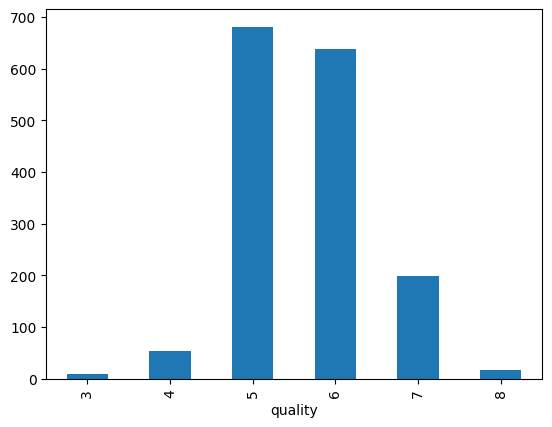

In [30]:
# 觀察資料類別不平衡程度
groups = df.groupby(by="quality").size()
groups.plot.bar()

資料清理

In [31]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
# 確認資料是否有缺失值
has_missing = df.isna().values.any()
print("DataFrame has missing values：", has_missing)
# 從結果中可確認資料中無缺失值

DataFrame has missing values： False


特徵工程

In [34]:
# 依據Santa Rosa article(http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf)，quality越高，游離二氧化硫濃度越高
# 抽取新特徵
df["mso2"] = df['free sulfur dioxide']/(1+10**df["pH"] - 1.81)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.003400
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.015782
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.008247
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.011768
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.003400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.011357
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.011781
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.011029
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.008615


<Axes: xlabel='quality'>

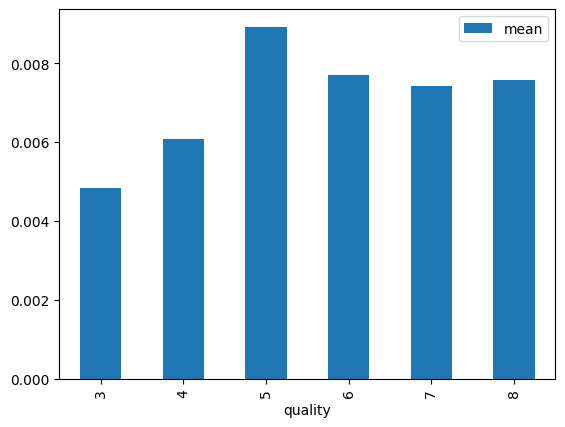

In [35]:
# 觀察各品質之游離二氧化硫平均濃度
df.groupby("quality")["mso2"].aggregate(['mean']).plot.bar()

使用機器學習訓練模型

In [36]:
# 資料型態轉換
# 將quality二分為"good"和"bad"
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0.003400
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0.015782
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0.008247
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad,0.011768
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0.003400


In [37]:
# 使用LabelEncoder將"quality"轉為數值表達形式
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.003400
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.015782
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.008247
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.011768
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.003400


quality
0    1382
1     217
Name: count, dtype: int64


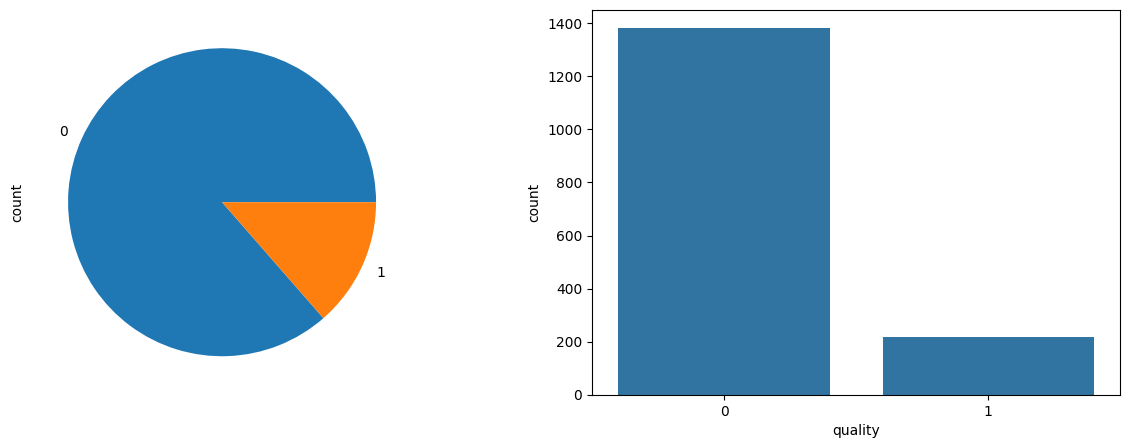

In [43]:
# 觀察型態轉換後的資料分布
print(df['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
df['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(x="quality", data=df, ax=ax[1])
plt.show()

In [39]:
# 訓練集與測試集與驗證集
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1151, 12)

(320, 12)

(128, 12)

In [57]:
# 訓練RandomForestClassifier模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=5, scoring="accuracy")
print(rfc_eval)

[0.91341991 0.89565217 0.89130435 0.89565217 0.92608696]


In [55]:
# 訓練LogisticRegression模型
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0, max_iter=3000)
log_eval = cross_val_score(log, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print(log_eval)

[0.88311688 0.87826087 0.87826087 0.86086957 0.87391304]


In [41]:
# 檢視RandomForestClassifier模型分數
from sklearn.metrics import classification_report
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
# Bad組的f1-score高達0.95，但此專案目標是分類出品質高的紅酒，因此著重Good組的表現
# Good組的f1-score不高，可進行模型優化提升分數

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       277
           1       0.81      0.40      0.53        43

    accuracy                           0.91       320
   macro avg       0.86      0.69      0.74       320
weighted avg       0.90      0.91      0.89       320



In [46]:
# 訓練並檢視LogisticRegression模型分數
clf = LogisticRegression().fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
# Bad組的f1-score高達0.92，但此專案目標是分類出品質高的紅酒，因此著重Good組的表現
# Good組的f1-score不高，並且比RandomForestClassifier模型的分數還低，因此選擇使用RandomForestClassifier模型

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       277
           1       0.47      0.16      0.24        43

    accuracy                           0.86       320
   macro avg       0.67      0.57      0.58       320
weighted avg       0.83      0.86      0.83       320



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


模型優化

In [47]:
# 超參數優化
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state=42)
Parameters = {
  'max_depth' : [5, 10, 20],
  'n_estimators': [10, 50, 100, 150],
}

cv = RandomizedSearchCV(rfc, Parameters, cv=5)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 50, 100, 150]})

In [48]:
# 檢視優化後的模型分數
pred_clf = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_clf))
# 優化後Good組的f1-score有提升，有達到優化成效

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       277
           1       0.71      0.47      0.56        43

    accuracy                           0.90       320
   macro avg       0.82      0.72      0.75       320
weighted avg       0.89      0.90      0.89       320



In [49]:
# 檢視最合適的模型參數
cv.best_params_

{'n_estimators': 50, 'max_depth': 20}